# Sales Prediciton - Simple Linear Regression

## Importing packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Reading CSV file

In [42]:
Advertising=pd.read_csv('./Advertising.csv')

In [41]:
Advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
Advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
Advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Univariate analysis

### Target Variable - Numerical

In [6]:
Advertising['Sales'].head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

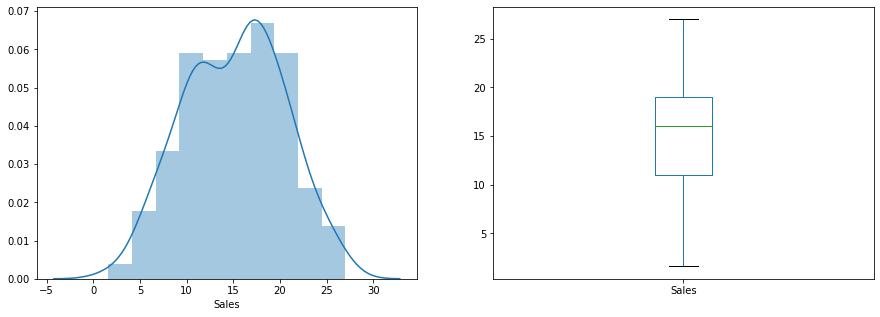

In [7]:
plt.subplot(121)
sns.distplot(Advertising['Sales']);
plt.subplot(122)
Advertising['Sales'].plot.box(figsize=(15,5));

### Numerical Variables

In [8]:
Advertising[['TV','Radio','Newspaper']].head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


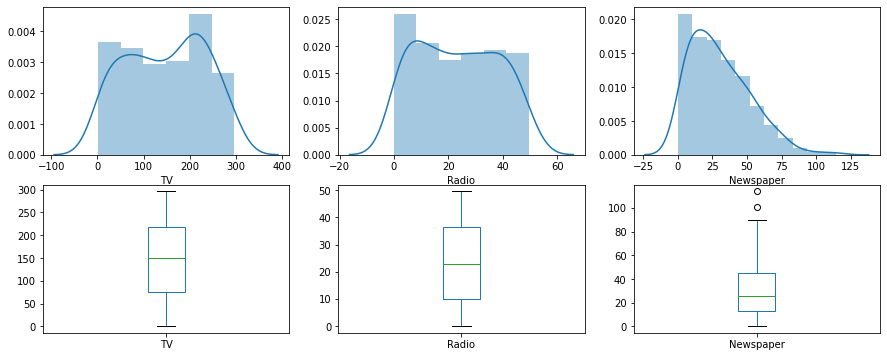

In [9]:
plt.subplot(231)
sns.distplot(Advertising['TV']);
plt.subplot(232)
sns.distplot(Advertising['Radio']);
plt.subplot(233)
sns.distplot(Advertising['Newspaper']);

plt.subplot(234)
Advertising['TV'].plot.box();
plt.subplot(235)
Advertising['Radio'].plot.box();
plt.subplot(236)
Advertising['Newspaper'].plot.box(figsize=(15,6));

## Bivariate Analysis

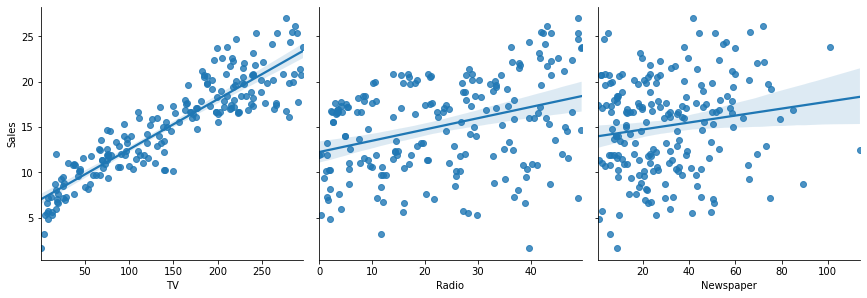

In [48]:
# Plotting the Least Squares Line
sns.pairplot(Advertising,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='reg',height=4,aspect=1);

## Correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


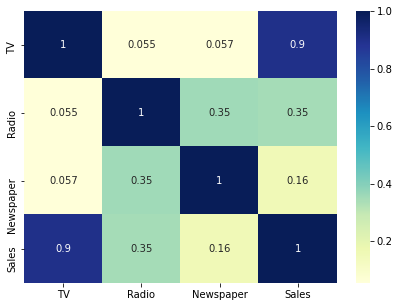

In [11]:
plt.figure(1,figsize=(7,5))
sns.heatmap(Advertising.corr(),cmap="YlGnBu", annot = True);
Advertising.corr()

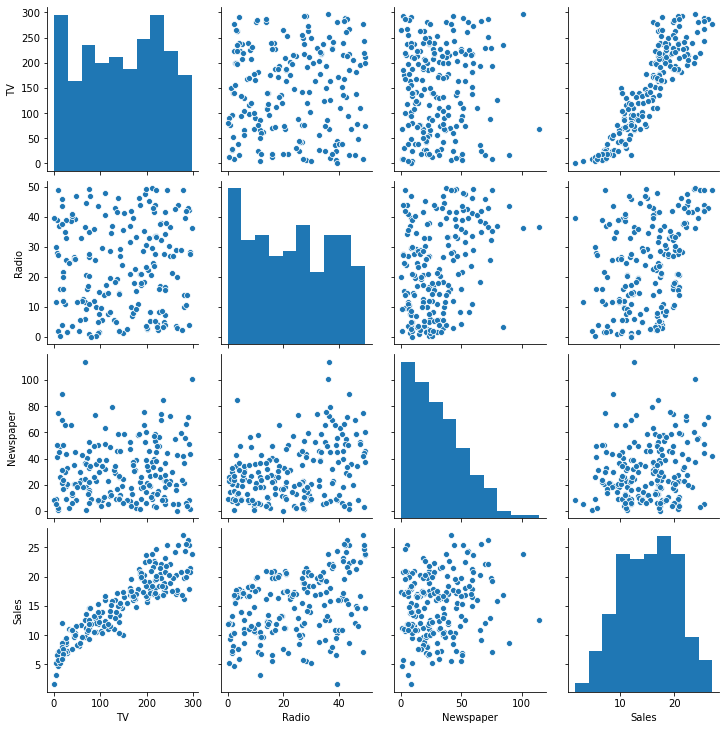

In [12]:
sns.pairplot(Advertising);

## Model Building

### Scikit Learn

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [47]:
x = Advertising['TV'].values.reshape(-1,1)
y = Advertising['Sales'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 0)
reg=LinearRegression()
reg.fit(x_train,y_train)
print(reg.coef_,reg.intercept_,)

[[0.05473199]] [7.14382225]


In [75]:
y_pred_skl=reg.predict(x_test)
res_scikit=pd.DataFrame({'Actual' : y_test.flatten(),'Predicted' : y_pred_skl.flatten()})
res_scikit.head()

,Actual,Predicted
0,11.3,10.931276
1,8.4,9.880422
2,12.0,12.091594
3,25.4,22.999681
4,16.7,16.459208


Mean Absolute Error: 1.8639438916550555
Mean Squared Error: 5.569539193467241
Root Mean Squared Error: 2.3599871172248466


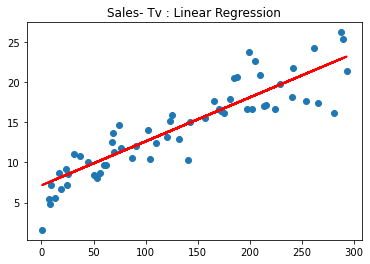

In [76]:
plt.subplot(111)
plt.scatter(x_test,y_test);
plt.plot(x_test,y_pred,'r',linewidth=2);
plt.title('Sales- Tv : Linear Regression');
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_skl))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_skl))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_skl)))

### Statsmodel

In [77]:
import statsmodels.api as sm
x_train_cons=sm.add_constant(x_train)
sm_res=sm.OLS(y_train,x_train_cons).fit()
print(sm_res.params,'\n\n\n\n',sm_res.summary())

[7.14382225 0.05473199] 



                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     573.1
Date:                Thu, 20 Aug 2020   Prob (F-statistic):           5.56e-51
Time:                        16:38:05   Log-Likelihood:                -312.40
No. Observations:                 140   AIC:                             628.8
Df Residuals:                     138   BIC:                             634.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1438  

In [78]:
x_test_cons=sm.add_constant(x_test)
y_pred_sm=sm_res.predict(x_test_cons)
res_statsmodel=pd.DataFrame({'Actual' : y_test.flatten(),'Predicted' : y_pred_sm.flatten()})
res_statsmodel.head()

,Actual,Predicted
0,11.3,10.931276
1,8.4,9.880422
2,12.0,12.091594
3,25.4,22.999681
4,16.7,16.459208


## Model Evaluation

### Residual analysis

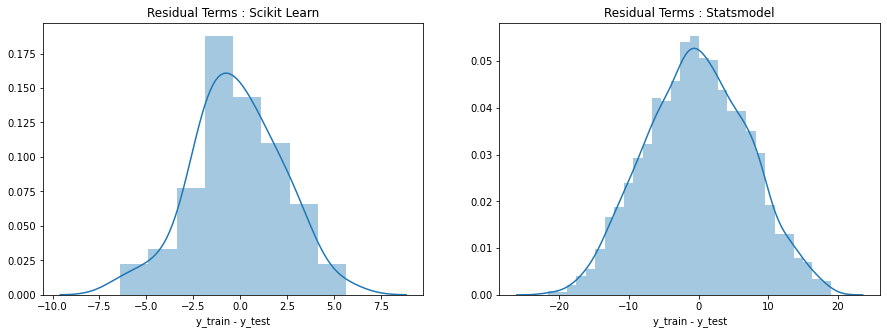

In [105]:
residual_skl=y_test-y_pred_skl
fig=plt.figure(1,figsize=(15,5))
plt.subplot(121)
sns.distplot(residual_skl)
plt.title('Residual Terms : Scikit Learn')
plt.xlabel('y_train - y_test')

residual_sm=y_test-y_pred_sm
plt.subplot(122)
sns.distplot(residual_sm)
plt.title('Residual Terms : Statsmodel')
plt.xlabel('y_train - y_test')
plt.show()
